# Lab:  Airline Routes Analysis

1. **Data Overview:**  
   - Load the CSV file and print the first 10 rows.  
   - Identify and describe the columns in the dataset. What does each column represent?

2. **Descriptive Statistics:**  
   - Calculate the mean, median, and standard deviation for both flight distances and ticket costs.  
   - What do these statistics tell you about the variability in flight distances and ticket pricing?

3. **Graph Construction:**  
   - Build a directed graph using NetworkX from the dataset.  
   - Discuss the benefits of visualizing airline routes as a graph. How does this help in understanding the overall network connectivity?

4. **Route Analysis:**  
   - Using Dijkstra’s algorithm, determine the shortest route (by flight distance) between `JFK` and `LAX`.  
   - Determine the cheapest route (by ticket cost) for the same pair of airports.  
   - Compare the two paths: Why might they differ? What factors could influence a traveler’s decision when choosing a route?

5. **Connection Metrics:**  
   - Compute the number of outbound flights per airport. Which airport appears to be the busiest in terms of departures?  
   - Compute the number of inbound flights per airport. Is there an airport that stands out as a major arrival hub?

6. **Cost Analysis:**  
   - For each airport, calculate the average and standard deviation of ticket costs for outbound flights.  
   - What might a high standard deviation indicate about ticket pricing at a specific airport?

7. **Visualization and Correlation:**  
   - Plot a histogram to show the distribution of ticket costs. What does the shape of the histogram suggest about the data?  
   - Create a scatter plot of flight distance versus ticket cost. Is there an observable correlation between the two? Discuss any trends you observe.

8. **Reflection and Extension:**  
   - What insights can you draw from the differences between the shortest (by distance) route and the cheapest (by cost) route?  
   - If you were a data analyst for an airline company, how might you use this data to inform business strategies such as pricing adjustments and route planning?  
   - *(Optional)* Modify the dataset—either by generating additional routes or adjusting existing values—and observe how the statistics and graph change. Report your findings and insights.


In [27]:
#This code generates a file with random flights...

import random
import csv

# List of sample airports.
airports = ['JFK', 'ATL', 'ORD', 'DFW', 'LAX', 'MIA', 'SFO', 'SEA', 'DEN', 'BOS', 'MEM', 'FLL', 'BNA', 'LGA']

# Set a seed for reproducibility.
random.seed(42)

# Create 100 entries.
num_entries = 50

with open('airline_routes.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header.
    writer.writerow(["source", "destination", "flight_distance_km", "ticket_cost"])
    for _ in range(num_entries):
        src = random.choice(airports)
        dest = random.choice(airports)
        # Ensure source and destination are not the same.
        while dest == src:
            dest = random.choice(airports)
        # Random flight distance between 300 km and 5000 km.
        flight_distance = random.randint(300, 5000)
        # Random ticket cost between $100 and $800.
        ticket_cost = random.randint(100, 800)
        writer.writerow([src, dest, flight_distance, ticket_cost])

In [29]:
# Load the dataset into a DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx



#1. Data Overview:
#Load the CSV file and print the first 10 rows.
#Identify and describe the columns in the dataset. What does each column represent?


# load airline routes from file
datafile = 'airline_routes.csv'
df = pd.read_csv(datafile)
print("Airline Routes Dataset (first 10 rows):")
print(df.head(10))

# Extract flight distances and ticket costs as NumPy arrays.
distances = df['flight_distance_km'].to_numpy()
costs = df['ticket_cost'].to_numpy()



Airline Routes Dataset (first 10 rows):
  source destination  flight_distance_km  ticket_cost
0    MEM         ATL                 504          381
1    DFW         ORD                1139          792
2    FLL         DEN                1012          704
3    SFO         JFK                 544          195
4    DFW         DEN                 517          674
5    DFW         FLL                4764          529
6    DFW         SEA                2578          106
7    BNA         ORD                3762          448
8    LAX         ORD                2063          444
9    ATL         SFO                1092          467


In [31]:
#2. Descriptive Statistics:
#   - Calculate the mean, median, and standard deviation for both flight distances and ticket costs.  
#   - What do these statistics tell you about the variability in flight distances and ticket pricing?


# Stats for flight dist
mean_distance = np.mean(distances)
median_distance = np.median(distances)
std_distance = np.std(distances)

# Stats for ticket cost
mean_cost = np.mean(costs)
median_cost = np.median(costs)
std_cost = np.std(costs)

print("\nFlight Distance Statistics:")
print(f"  Mean: {mean_distance:.2f} km")
print(f"  Median: {median_distance:.2f} km")
print(f"  Standard Deviation: {std_distance:.2f} km")

print("\nTicket Cost Statistics:")
print(f"  Mean: ${mean_cost:.2f}")
print(f"  Median: ${median_cost:.2f}")
print(f"  Standard Deviation: ${std_cost:.2f}")






Flight Distance Statistics:
  Mean: 2354.94 km
  Median: 2208.00 km
  Standard Deviation: 1363.82 km

Ticket Cost Statistics:
  Mean: $472.52
  Median: $478.00
  Standard Deviation: $224.58


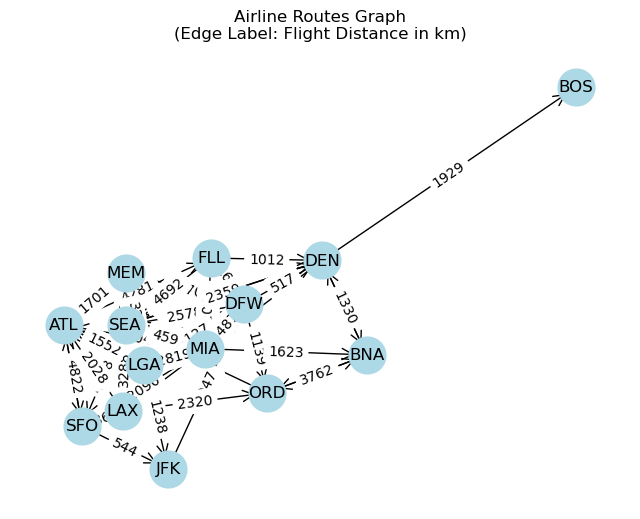

In [33]:
# Visualize engagement distribution and temporal trends with Matplotlib

#3. **Graph Construction:**  
#   - Build a directed graph using NetworkX from the dataset.  
#   - Discuss the benefits of visualizing airline routes as a graph. How does this help in understanding the overall network connectivity?

# Create a directed graph from the dataset.
G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_edge(row['source'], row['destination'],
               flight_distance=row['flight_distance_km'],
               ticket_cost=row['ticket_cost'])

# Generate node positions for visualization.
pos = nx.spring_layout(G, seed=70)




# Draw the graph using flight distance as the edge label.
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G, 'flight_distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Airline Routes Graph\n(Edge Label: Flight Distance in km)")
plt.axis('off')
plt.show()





In [35]:


# 4.  **Route Analysis:**  
# - Using Dijkstra’s algorithm, determine the shortest route (by flight distance) between `JFK` and `LAX`.  
# - Determine the cheapest route (by ticket cost) for the same pair of airports.  
#- Compare the two paths: Why might they differ? What factors could influence a traveler’s decision when choosing a route?

# Define source and target airports.
source_airport = 'JFK'
target_airport = 'LAX'

# Compute the shortest path by flight distance using Dijkstra's algorithm.  I just wanted to add this for the 
#completeness of your notes...dijkstra will not produce a path if there is not a path from the source to 
#the target..

shortest_distance_path = nx.shortest_path(G, source=source_airport, target=target_airport, weight='flight_distance')
total_distance = nx.shortest_path_length(G, source=source_airport, target=target_airport, weight='flight_distance')
print(f"\nShortest path by distance from {source_airport} to {target_airport}: {shortest_distance_path}")
print(f"Total flight distance: {total_distance} km")


# Compute the cheapest path by ticket cost using Dijkstra's algorithm.
cheapest_path = nx.shortest_path(G, source=source_airport, target=target_airport, weight='ticket_cost')
total_cost = nx.shortest_path_length(G, source=source_airport, target=target_airport, weight='ticket_cost')
print(f"\nCheapest path by ticket cost from {source_airport} to {target_airport}: {cheapest_path}")
print(f"Total ticket cost: ${total_cost}")

#Note that this is MADE UP data so this is not really right in terms of distance:)  



Shortest path by distance from JFK to LAX: ['JFK', 'DFW', 'DEN', 'LAX']
Total flight distance: 9273 km

Cheapest path by ticket cost from JFK to LAX: ['JFK', 'DFW', 'SEA', 'SFO', 'LAX']
Total ticket cost: $856


In [39]:
#Part 5 Connection Metrics:

#Compute the number of outbound flights per airport. Which airport appears to be the busiest in terms of departures?
#Compute the number of inbound flights per airport. Is there an airport that stands out as a major arrival hub?
# Calculate the number of outbound flights per airport.


outbound_counts = df.groupby('source').size()

print("\nNumber of Outbound Flights per Airport:")
print(outbound_counts)




# Calculate the number of inbound flights per airport.
inbound_counts = df.groupby('destination').size()
print("\nNumber of Inbound Flights per Airport:")
print(inbound_counts)

#the arrival/departure hubs will change based on the data here so I'm not going to hard code that in the solutions:)   Remember we 
#randomly generated this dummy data:) 


Number of Outbound Flights per Airport:
source
ATL    4
BNA    3
DEN    5
DFW    5
FLL    4
JFK    1
LAX    4
LGA    6
MEM    5
MIA    5
ORD    2
SEA    2
SFO    4
dtype: int64

Number of Inbound Flights per Airport:
destination
ATL    6
BNA    4
BOS    1
DEN    5
DFW    5
FLL    3
JFK    3
LAX    2
LGA    2
MEM    1
MIA    4
ORD    4
SEA    7
SFO    3
dtype: int64



Outbound Ticket Cost Statistics per Airport:
        avg_ticket_cost  std_ticket_cost
source                                  
ATL          525.250000       268.362162
BNA          464.000000       241.398012
DEN          495.200000       274.695650
DFW          449.400000       309.891594
FLL          568.750000       242.218049
JFK          180.000000              NaN
LAX          516.000000       199.619638
LGA          562.333333       239.788796
MEM          362.200000       175.506980
MIA          511.000000       234.385366
ORD          539.500000       241.123412
SEA          456.000000       296.984848
SFO          290.000000        90.704649


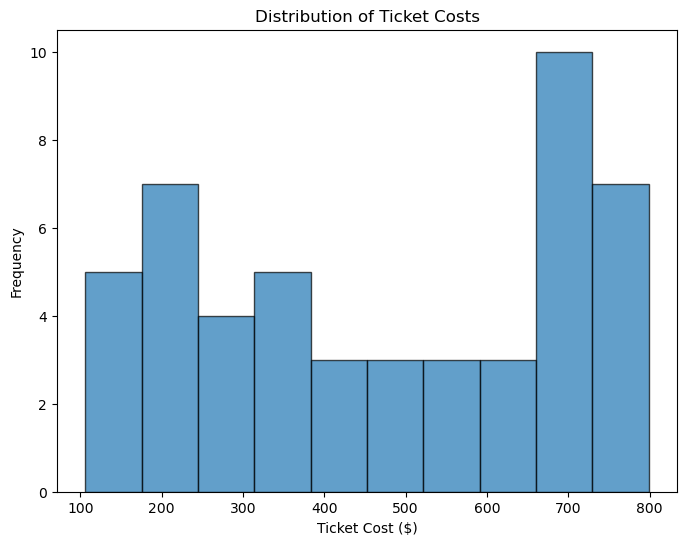

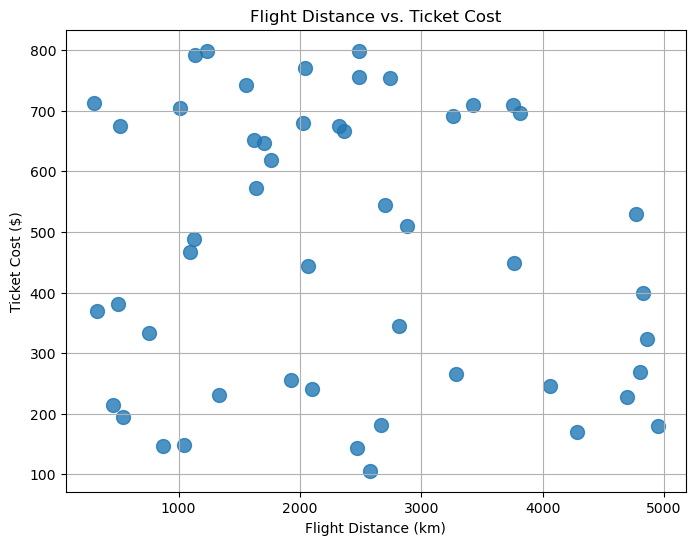

In [43]:
#6. **Cost Analysis:**  
#   - For each airport, calculate the average and standard deviation of ticket costs for outbound flights.  
#   - What might a high standard deviation indicate about ticket pricing at a specific airport?



# Analyze outbound ticket cost statistics per airport.

cost_stats = df.groupby('source').agg(avg_ticket_cost= ('ticket_cost','mean'), std_ticket_cost=('ticket_cost','std'))
print("\nOutbound Ticket Cost Statistics per Airport:")
print(cost_stats)


#7. **Visualization and Correlation:**  
#   - Plot a histogram to show the distribution of ticket costs. What does the shape of the histogram suggest about the data?  
#   - Create a scatter plot of flight distance versus ticket cost. Is there an observable correlation between the two? Discuss any trends you observe.



# Plot histogram of ticket cost distribution.
plt.figure(figsize=(8, 6))
plt.hist(df['ticket_cost'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Ticket Costs")
plt.xlabel("Ticket Cost ($)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Flight Distance vs. Ticket Cost.
plt.figure(figsize=(8, 6))
plt.scatter(df['flight_distance_km'], df['ticket_cost'], s=100, alpha=0.8)
plt.title("Flight Distance vs. Ticket Cost")
plt.xlabel("Flight Distance (km)")
plt.ylabel("Ticket Cost ($)")
plt.grid(True)
plt.show()